# Análise Exploratória dos Dados (EDA)

Este notebook apresenta a análise exploratória das bases de dados do desafio de análise
de crédito, com foco na compreensão das variáveis, distribuição da variável alvo e
qualidade dos dados.

Os dados utilizados neste notebook foram previamente ingeridos e armazenados em
formato Parquet pelo notebook `00_data_ingestion.ipynb`.


In [179]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [182]:
from pathlib import Path
import pandas as pd

# ============================================================
# ROOT DO PROJETO (subindo da pasta notebooks)
# ============================================================
PROJECT_ROOT = Path.cwd().parent

CHALLENGE_NAME = "desafio_01"

# ============================================================
# DIRETÓRIOS DE DADOS
# ============================================================
DATA_PROCESSED_DIR = (
    PROJECT_ROOT / "data" / CHALLENGE_NAME / "processed"
)

DATA_PROCESSED_DIR


WindowsPath('c:/Users/ggrinspun/Github/desafio-analise-de-credito/data/desafio_01/processed')

In [183]:
df_train = pd.read_parquet(DATA_PROCESSED_DIR / "train.parquet")
df_test  = pd.read_parquet(DATA_PROCESSED_DIR / "test.parquet")
df_oot   = pd.read_parquet(DATA_PROCESSED_DIR / "oot.parquet")

print("Train:", df_train.shape)
print("Test :", df_test.shape)
print("OOT  :", df_oot.shape)

Train: (120750, 151)
Test : (51751, 151)
OOT  : (91965, 150)


In [92]:
df_train

,REF_DATE,TARGET,VAR2,IDADE,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,...,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,ID
0,2017-06-01 00:00:00+00:00,0,M,34.137,None,RO,-8.808779,-63.878470,D,E,...,2680.289259,D,None,None,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,181755
1,2017-08-18 00:00:00+00:00,0,M,40.447,None,PB,-7.146537,-34.926080,E,E,...,1777.725469,E,None,None,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,287633
2,2017-06-30 00:00:00+00:00,0,F,33.515,None,RS,-27.900178,-53.314035,None,E,...,1695.494979,E,None,None,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,88015
3,2017-08-05 00:00:00+00:00,1,F,25.797,None,BA,-12.948874,-38.451863,E,E,...,1399.037809,E,None,None,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,122576
4,2017-07-29 00:00:00+00:00,0,F,54.074,None,RS,-30.051810,-51.213277,B,E,...,7868.793296,C,None,None,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,1272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120745,2017-03-07 00:00:00+00:00,0,M,30.474,None,BA,-12.900183,-38.673056,E,E,...,1752.116912,E,None,None,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,163230
120746,2017-07-27 00:00:00+00:00,0,F,19.570,None,SP,-22.172110,-47.374184,E,E,...,1510.234174,E,None,None,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,315754
120747,2017-05-04 00:00:00+00:00,0,M,32.882,None,SP,-22.327290,-49.033763,None,E,...,1736.106081,E,None,None,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,156370
120748,2017-03-04 00:00:00+00:00,1,None,NaN,None,PA,-1.393497,-48.395074,None,E,...,1364.454508,E,None,None,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,232713


In [93]:
df_train.describe()

,TARGET,IDADE,VAR6,VAR7,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,...,VAR41,VAR42,VAR44,VAR46,VAR47,VAR141,VAR145,VAR146,VAR147,ID
count,120750.000000,107040.000000,117394.000000,117394.000000,74488.000000,65724.000000,15530.000000,95197.000000,58269.000000,44981.000000,...,117811.000000,107048.000000,401.000000,294.000000,120750.000000,120750.000000,679.000000,168.000000,120750.000000,120750.000000
mean,0.245027,42.125255,-14.411389,-45.903480,0.235917,0.290241,0.313850,0.241245,0.185754,2.044374,...,0.631175,0.504619,1691.738429,6984.218469,0.256543,1854.833006,4018.743785,1942.649762,101.841656,165324.864199
std,0.430105,15.198476,8.995077,7.529788,0.625609,0.308937,0.241229,0.262687,0.195320,3.170869,...,0.222607,0.069614,2177.830516,4621.964093,0.406746,893.999792,3700.836248,3143.757850,0.540016,95488.442320
min,0.000000,18.014000,-33.521563,-72.900276,-4.000000,0.000000,0.000000,0.000000,0.000000,0.083333,...,0.000000,0.006658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,3.000000
25%,0.000000,30.057250,-22.842778,-49.903564,0.000000,0.055000,0.056000,0.105000,0.078000,0.250000,...,0.440572,0.463579,642.000000,3888.995000,0.000000,1513.227400,1633.195000,0.000000,102.000000,82727.250000
50%,0.000000,39.867000,-13.010590,-46.574908,0.000000,0.159000,0.318000,0.140000,0.112000,0.833333,...,0.542298,0.496036,769.000000,5386.310000,0.003000,1627.157652,3024.480000,935.120000,102.000000,165298.000000
75%,0.000000,52.997000,-6.357067,-39.023621,0.000000,0.505000,0.507000,0.168000,0.153000,2.416667,...,0.898052,0.522576,1747.500000,9601.390000,0.421000,1820.670284,5217.670000,2260.125000,102.000000,248248.000000
max,1.000000,105.477000,4.602823,-32.429516,4.000000,1.500000,1.000000,1.700000,1.000000,15.999999,...,1.000000,0.910865,17374.940000,26523.920000,1.000000,33954.140000,33954.140000,17229.200000,102.000000,330581.000000


# Analise de dados ausentes

## linhas

In [94]:
cols_ignore = [
    "ID",
    "TARGET",
    "REF_DATE",
]


In [95]:
feature_cols = [c for c in df_train.columns if c not in cols_ignore]

In [96]:
rows_all_missing = df_train[feature_cols].isnull().all(axis=1)

rows_all_missing.sum()


np.int64(0)

Foi avaliada a existência de observações totalmente desprovidas de informação nas
variáveis explicativas, desconsiderando identificadores, variáveis temporais e a
variável alvo. Não foram identificadas observações
nessa condição, de modo que não se justificou a remoção de linhas do conjunto de dados,
evitando a introdução de viés de seleção.


## Colunas

In [97]:
missing_df = (
    df_train
    .isnull()
    .mean()
    .mul(100)
    .sort_values(ascending=False)
    .to_frame(name="missing_pct")
)

missing_df.head(10)


,missing_pct
VAR146,99.860870
VAR4,99.832712
VAR46,99.756522
VAR45,99.756522
VAR44,99.667909
VAR43,99.667909
VAR145,99.437681
VAR38,99.363147
VAR26,99.165217
VAR27,99.137060


In [98]:
print(missing_df)

        missing_pct
VAR146    99.860870
VAR4      99.832712
VAR46     99.756522
VAR45     99.756522
VAR44     99.667909
...             ...
VAR141     0.000000
VAR147     0.000000
VAR148     0.000000
VAR149     0.000000
ID         0.000000

[151 rows x 1 columns]


In [99]:
missing_info = (
    df_train
    .isnull()
    .mean()
    .mul(100)
    .to_frame(name="missing_pct")
    .join(df_train.dtypes.to_frame(name="dtype"))
    .sort_values("missing_pct", ascending=False)
)

missing_info.head(10)


,missing_pct,dtype
VAR146,99.860870,float64
VAR4,99.832712,object
VAR46,99.756522,float64
VAR45,99.756522,object
VAR44,99.667909,float64
VAR43,99.667909,object
VAR145,99.437681,float64
VAR38,99.363147,object
VAR26,99.165217,float64
VAR27,99.137060,float64


In [100]:
MISSING_THRESHOLD = 60.0

# lista de colunas com missing acima do threshold
cols_high_missing = missing_info[
    missing_info["missing_pct"] > MISSING_THRESHOLD
].index.tolist()

# dataframe apenas com essas colunas
df_high_missing = df_train[cols_high_missing]

df_high_missing.shape

(120750, 29)

In [101]:
df_high_missing

,VAR146,VAR4,VAR46,VAR45,VAR44,VAR43,VAR145,VAR38,VAR26,VAR27,...,VAR17,VAR13,VAR23,VAR21,VAR29,VAR37,VAR36,VAR35,VAR32,VAR16
0,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,0.416667
1,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN
2,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,124.0,S,S,None,0.166667
3,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,112.0,S,S,None,NaN
4,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120745,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,4.000000
120746,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN
120747,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,0.333,NaN,None,None,None,1.750000
120748,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN


Eliminar colunas com mais de 60% dos dados ausentes, com exceção de Var32

Embora a maioria das variáveis com percentual de dados ausentes superior a 60% tenha
sido removida, a variável VAR32 foi mantida por apresentar baixo número de categorias
distintas e conteúdo semântico relevante. Observou-se que seus valores não nulos
representam estados específicos relacionados à situação financeira do cliente, e que
a ausência da informação pode, por si só, carregar sinal informativo para o modelo.
Dessa forma, optou-se por tratar explicitamente os valores ausentes dessa variável,
mantendo-a no conjunto final de atributos, alem disso, a variavel VAR16 tambem foi mantida para uma analise mais aprofundada.


In [102]:
EXCEPTION_COLS = [
    "VAR32",  # variável considerada semanticamente relevante
    "VAR16",  # mantida apesar do alto missing (decisão de negócio)
]
cols_to_drop_final = [
    col for col in cols_high_missing
    if col not in EXCEPTION_COLS
]

In [103]:
df_train_reduced = df_train.drop(columns=cols_to_drop_final)
df_test_reduced  = df_test.drop(columns=cols_to_drop_final)
df_oot_reduced   = df_oot.drop(columns=cols_to_drop_final)

In [104]:
df_train_reduced

,REF_DATE,TARGET,VAR2,IDADE,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR147,VAR148,VAR149,ID
0,2017-06-01 00:00:00+00:00,0,M,34.137,RO,-8.808779,-63.878470,D,E,BAIXA,...,LONGE,LONGE,MEDIO,LONGE,2680.289259,D,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,181755
1,2017-08-18 00:00:00+00:00,0,M,40.447,PB,-7.146537,-34.926080,E,E,MEDIA,...,LONGE,LONGE,LONGE,MUITO LONGE,1777.725469,E,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,287633
2,2017-06-30 00:00:00+00:00,0,F,33.515,RS,-27.900178,-53.314035,None,E,ALTISSIMA,...,LONGE,MUITO LONGE,LONGE,MUITO PROXIMO,1695.494979,E,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,88015
3,2017-08-05 00:00:00+00:00,1,F,25.797,BA,-12.948874,-38.451863,E,E,MEDIA,...,MEDIO,LONGE,MEDIO,MEDIO,1399.037809,E,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,122576
4,2017-07-29 00:00:00+00:00,0,F,54.074,RS,-30.051810,-51.213277,B,E,MEDIA,...,PROXIMO,MUITO PROXIMO,PROXIMO,MUITO PROXIMO,7868.793296,C,102,EMAIL INEXISTENTE,2.6.1,1272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120745,2017-03-07 00:00:00+00:00,0,M,30.474,BA,-12.900183,-38.673056,E,E,ALTISSIMA,...,LONGE,LONGE,MUITO LONGE,MUITO LONGE,1752.116912,E,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,163230
120746,2017-07-27 00:00:00+00:00,0,F,19.570,SP,-22.172110,-47.374184,E,E,MEDIA,...,MEDIO,MEDIO,MEDIO,LONGE,1510.234174,E,102,EMAIL INEXISTENTE,2.6.1,315754
120747,2017-05-04 00:00:00+00:00,0,M,32.882,SP,-22.327290,-49.033763,None,E,MEDIA,...,MEDIO,PROXIMO,MEDIO,LONGE,1736.106081,E,102,EMAIL INEXISTENTE,2.6.1,156370
120748,2017-03-04 00:00:00+00:00,1,None,NaN,PA,-1.393497,-48.395074,None,E,MEDIA,...,LONGE,MEDIO,LONGE,LONGE,1364.454508,E,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,232713


Embora a maioria das variáveis com percentual de dados ausentes superior a 60% tenha
sido removida, Duas colunas podem possuir informações relevantes para a analise e por isso serã mantidas e tratadas com processamentos diferentes.

### var32

In [105]:
pd.DataFrame({
    "column": df_train_reduced.columns,
    "dtype": df_train_reduced.dtypes
}).sort_values("dtype").head(20)

,column,dtype
ID,ID,int64
TARGET,TARGET,int64
VAR147,VAR147,int64
VAR47,VAR47,float64
VAR42,VAR42,float64
VAR41,VAR41,float64
VAR39,VAR39,float64
VAR25,VAR25,float64
VAR24,VAR24,float64
VAR22,VAR22,float64


In [106]:
missing_after = (
    df_train_reduced
    .isnull()
    .mean()
    .mul(100)
    .sort_values(ascending=False)
)

print(missing_after)


VAR32     65.174327
VAR16     62.748654
VAR15     51.744099
VAR25     51.744099
VAR19     51.744099
            ...    
VAR141     0.000000
VAR147     0.000000
VAR148     0.000000
VAR149     0.000000
ID         0.000000
Length: 124, dtype: float64


In [107]:
df_train_reduced["VAR32"].value_counts(normalize=True, dropna=False)


VAR32
None                           0.651743
DECLARACAO NAO ENVIADA         0.289631
CREDITADA                      0.030369
SALDO INEXISTENTE              0.013822
IMPOSTO A PAGAR                0.010178
DECLARACAO ENVIADA             0.003437
DEVOLVIDA A RECEITA FEDERAL    0.000505
AGUARDANDO REAGENDAMENTO       0.000315
Name: proportion, dtype: float64

In [108]:
pd.crosstab(
    df_train_reduced["VAR32"].fillna("NAO_INFORMADO"),
    df_train_reduced["TARGET"],
    normalize="index"
)

TARGET,0,1
VAR32,,
AGUARDANDO REAGENDAMENTO,0.868421,0.131579
CREDITADA,0.818107,0.181893
DECLARACAO ENVIADA,0.773494,0.226506
DECLARACAO NAO ENVIADA,0.770995,0.229005
DEVOLVIDA A RECEITA FEDERAL,0.852459,0.147541
IMPOSTO A PAGAR,0.793328,0.206672
NAO_INFORMADO,0.742636,0.257364
SALDO INEXISTENTE,0.823247,0.176753


In [109]:
df_train_reduced["VAR32"] = df_train_reduced["VAR32"].fillna("NAO_INFORMADO")
df_test_reduced["VAR32"]  = df_test_reduced["VAR32"].fillna("NAO_INFORMADO")
df_oot_reduced["VAR32"]   = df_oot_reduced["VAR32"].fillna("NAO_INFORMADO")


In [110]:
freq = df_train_reduced["VAR32"].value_counts(normalize=True)
rare_cats = freq[freq < 0.01].index

for df in [df_train_reduced, df_test_reduced, df_oot_reduced]:
    df["VAR32"] = df["VAR32"].replace(rare_cats, "OUTROS")


### VAR16

In [111]:
print(df_train_reduced["VAR16"].value_counts(normalize=True, dropna=False))


VAR16
NaN          0.627487
0.083333     0.051453
0.166667     0.031006
0.250000     0.026277
0.333333     0.019280
               ...   
15.916667    0.000050
15.666667    0.000041
14.500000    0.000041
15.500000    0.000033
15.750000    0.000008
Name: proportion, Length: 193, dtype: float64


Analise para identificar se essa coluna pode ser uma variável independente relevante para ser utilizada para a modelagem.

In [112]:
df_train_reduced["VAR16_missing_flag"] = (
    df_train_reduced["VAR16"].isna().astype(int)
)
#-
df_var16_notnull = df_train_reduced[
    df_train_reduced["VAR16"].notna()
].copy()

df_var16_notnull.groupby("TARGET")["VAR16"].describe()

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,35069.0,2.092926,3.229104,0.083333,0.25,0.833333,2.416667,15.999999
1,9912.0,1.872595,2.949380,0.083333,0.25,0.666667,2.250000,15.999999


In [113]:
# oot e test
for df_ in [df_train_reduced, df_test_reduced, df_oot_reduced]:
    df_["VAR16_missing_flag"] = df_["VAR16"].isna().astype(int)


In [114]:
print(df_var16_notnull.groupby("TARGET")["VAR16"].describe())

          count      mean       std       min   25%       50%       75%  \
TARGET                                                                    
0       35069.0  2.092926  3.229104  0.083333  0.25  0.833333  2.416667   
1        9912.0  1.872595  2.949380  0.083333  0.25  0.666667  2.250000   

              max  
TARGET             
0       15.999999  
1       15.999999  


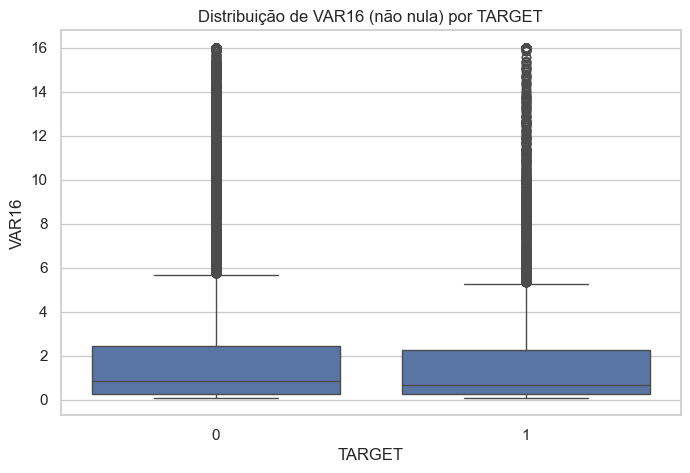

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_var16_notnull,
    x="TARGET",
    y="VAR16"
)
plt.title("Distribuição de VAR16 (não nula) por TARGET")
plt.show()

In [116]:
print(pd.crosstab(
    df_train_reduced["VAR16_missing_flag"],
    df_train_reduced["TARGET"],
    normalize="index"
))

TARGET                     0         1
VAR16_missing_flag                    
0                   0.779640  0.220360
1                   0.740329  0.259671


In [117]:
for df_ in [df_train_reduced, df_test_reduced, df_oot_reduced]:
    df_["VAR16_missing_flag"] = df_["VAR16"].isna().astype(int)


In [118]:
df_train_reduced = df_train_reduced.drop(columns=["VAR16"])

# oot e test
for df_ in [df_test_reduced, df_oot_reduced]:
    df_.drop(columns=["VAR16"], inplace=True)


A variável VAR16 apresentou elevado percentual de valores ausentes. A análise indicou que, embora o valor numérico da variável possua baixo poder discriminativo isolado, a ausência de informação está associada a uma maior taxa de ocorrência do evento de interesse. Dessa forma, optou-se por manter apenas uma variável indicadora de missing, removendo o valor original de VAR16, a fim de preservar o sinal relevante e reduzir ruído no conjunto de dados

VAR16_missing_flag = 0 → 22,0% de TARGET=1

VAR16_missing_flag = 1 → 25,97% de TARGET=1

Δ ≈ +3,6 p.p.

# TRATAMENTO DE VARIÁVEIS CATEGÓRICAS

In [119]:
cat_cols = df_train_reduced.select_dtypes(
    include=["object", "category"]
).columns.tolist()

In [120]:
dtype_check = df_train_reduced[cat_cols].dtypes.value_counts()
dtype_check

object    102
Name: count, dtype: int64

Nessa amostra duas colunas chamam atenção:

### VAR149 - parece ser um valor constante

In [121]:
for df_ in [df_train_reduced, df_test_reduced, df_oot_reduced]:
    df_.drop(columns=["VAR149"], inplace=True)
cat_cols = [c for c in cat_cols if c != "VAR149"]


### VAR148 - A coluna possui bastante informação

In [122]:
var148_counts = (
    df_train_reduced["VAR148"]
    .fillna("NAO_INFORMADO")
    .value_counts(dropna=False)
    .to_frame("count")
)

var148_counts["pct"] = (var148_counts["count"] / len(df_train_reduced) * 100).round(4)

var148_counts


,count,pct
VAR148,,
EMAIL INEXISTENTE,52379,43.3781
EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INEXISTENTE,50779,42.0530
OPERACAO REALIZADA COM SUCESSO,9560,7.9172
NOME INEXISTENTE#@#EMAIL INEXISTENTE,7130,5.9048
CEP INEXISTENTE#@#EMAIL INEXISTENTE,480,0.3975
NOME INEXISTENTE,413,0.3420
CEP INEXISTENTE,6,0.0050
NOME INEXISTENTE#@#CEP INEXISTENTE,3,0.0025


In [123]:
print(var148_counts)

                                                    count      pct
VAR148                                                            
EMAIL INEXISTENTE                                   52379  43.3781
EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INEX...  50779  42.0530
OPERACAO REALIZADA COM SUCESSO                       9560   7.9172
NOME INEXISTENTE#@#EMAIL INEXISTENTE                 7130   5.9048
CEP INEXISTENTE#@#EMAIL INEXISTENTE                   480   0.3975
NOME INEXISTENTE                                      413   0.3420
CEP INEXISTENTE                                         6   0.0050
NOME INEXISTENTE#@#CEP INEXISTENTE                      3   0.0025


In [124]:
for df_ in [df_train_reduced, df_test_reduced, df_oot_reduced]:
    s = df_["VAR148"].fillna("")

    df_["VAR148_has_EMAIL_INEXISTENTE"] = s.str.contains(
        "EMAIL INEXISTENTE", regex=False
    ).astype(int)

    df_["VAR148_has_NOME_INEXISTENTE"] = s.str.contains(
        "NOME INEXISTENTE", regex=False
    ).astype(int)

    df_["VAR148_has_CEP_INEXISTENTE"] = s.str.contains(
        "CEP INEXISTENTE", regex=False
    ).astype(int)

    df_["VAR148_has_SUCESSO"] = s.str.contains(
        "OPERACAO REALIZADA COM SUCESSO", regex=False
    ).astype(int)

    df_["VAR148_num_inconsistencias"] = (
        s.str.split("#@#")
         .apply(lambda x: sum("INEXISTENTE" in item for item in x))
    )

In [125]:

flag_cols = [c for c in df_train_reduced.columns if c.startswith("VAR148_")]

print(df_train_reduced[flag_cols].mean().sort_values(ascending=False))



VAR148_num_inconsistencias      1.824936
VAR148_has_EMAIL_INEXISTENTE    0.917333
VAR148_has_NOME_INEXISTENTE     0.483023
VAR148_has_CEP_INEXISTENTE      0.424580
VAR148_has_SUCESSO              0.079172
dtype: float64


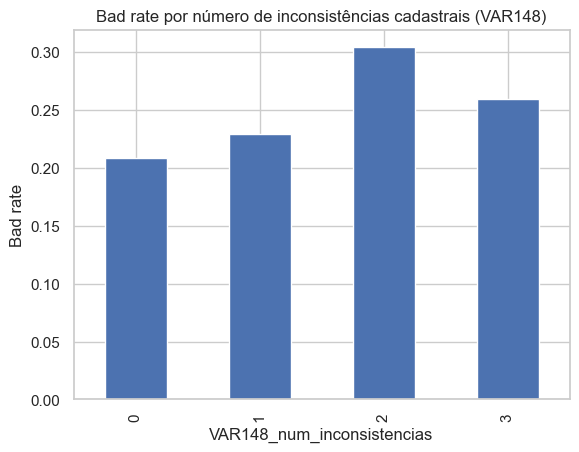

                            count  bad_rate
VAR148_num_inconsistencias                 
0                            9560  0.208682
1                           52798  0.229459
2                            7613  0.303822
3                           50779  0.259241


In [126]:
import matplotlib.pyplot as plt

rates = (
    df_train_reduced
    .groupby("VAR148_num_inconsistencias")["TARGET"]
    .mean()
)

rates.plot(kind="bar")
plt.ylabel("Bad rate")
plt.title("Bad rate por número de inconsistências cadastrais (VAR148)")
plt.show()

print((
    df_train_reduced
    .groupby("VAR148_num_inconsistencias")["TARGET"]
    .agg(
        count="count",
        bad_rate="mean"
    )
    .sort_index()
))


In [127]:
for c in flag_cols:
    print(f"\n=== {c} ===")
    print((
        df_train_reduced
        .groupby(c)["TARGET"]
        .agg(
            count="count",
            bad_rate="mean"
        ))
    )



=== VAR148_has_EMAIL_INEXISTENTE ===
                               count  bad_rate
VAR148_has_EMAIL_INEXISTENTE                  
0                               9982  0.206872
1                             110768  0.248465

=== VAR148_has_NOME_INEXISTENTE ===
                             count  bad_rate
VAR148_has_NOME_INEXISTENTE                 
0                            62425  0.226800
1                            58325  0.264535

=== VAR148_has_CEP_INEXISTENTE ===
                            count  bad_rate
VAR148_has_CEP_INEXISTENTE                 
0                           69482  0.234665
1                           51268  0.259070

=== VAR148_has_SUCESSO ===
                     count  bad_rate
VAR148_has_SUCESSO                  
0                   111190  0.248152
1                     9560  0.208682

=== VAR148_num_inconsistencias ===
                            count  bad_rate
VAR148_num_inconsistencias                 
0                            9560  0.208682
1

Tratamento da variável VAR148

A variável VAR148 contém informações operacionais relacionadas à qualidade do cadastro, indicando a presença de inconsistências como e-mail, nome ou CEP inexistentes, bem como registros de operação realizada com sucesso. Em vez de utilizá-la como categoria textual, a variável foi decomposta em indicadores binários representando cada tipo de inconsistência e em uma variável numérica que contabiliza o número total de inconsistências por registro.

As colunas derivadas foram: `VAR148_has_EMAIL_INEXISTENTE`, `VAR148_has_NOME_INEXISTENTE`, `VAR148_has_CEP_INEXISTENTE`, `VAR148_has_SUCESSO` e `VAR148_num_inconsistencias`. A análise mostrou que a presença de inconsistências (em geral) está associada a maiores taxas de ocorrência do evento de interesse (TARGET = 1), enquanto a indicação de operação realizada com sucesso apresenta efeito protetivo. Observou-se ainda aumento expressivo do risco conforme cresce o número de inconsistências, justificando a manutenção das variáveis derivadas no conjunto de dados.


### Identificação de bad rate

In [128]:
def worst_bad_rate_per_variable(df, col, target="TARGET", min_count=50):
    tmp = df[[col, target]].copy()
    tmp[col] = tmp[col].fillna("NAO_INFORMADO")
    
    stats = (
        tmp
        .groupby(col)[target]
        .agg(
            count="count",
            bad_rate="mean"
        )
    )
    
    # filtra categorias muito pequenas
    stats = stats[stats["count"] >= min_count]
    
    if stats.empty:
        return None
    
    return stats["bad_rate"].max()


In [129]:
worst_bad_rates = {}

for col in cat_cols:
    val = worst_bad_rate_per_variable(df_train_reduced, col)
    if val is not None:
        worst_bad_rates[col] = val

worst_bad_rate_df = (
    pd.Series(worst_bad_rates)
    .sort_values(ascending=False)
    .to_frame(name="max_bad_rate")
)

worst_bad_rate_df.head(10)


,max_bad_rate
REF_DATE,0.576208
VAR142,0.441176
VAR127,0.373832
VAR8,0.329193
VAR130,0.326733
VAR5,0.321207
VAR65,0.313877
VAR52,0.313877
VAR51,0.313877
VAR53,0.313877


A análise global das variáveis categóricas não identificou categorias associadas a taxas
extremamente elevadas de inadimplência. O maior valor observado de bad rate foi de
aproximadamente 44%, enquanto o menor situou-se em torno de 25%, indicando ausência de
variáveis com comportamento suspeito ou indícios de vazamento de informação. Esses
resultados sugerem que o risco está distribuído entre múltiplos atributos, reforçando
a necessidade de modelagem multivariada.

## profiling categórico

- Para cada variável categórica, foi construido um perfil estrutural que descreve quantas categorias existem, quão balanceadas elas são e quanto risco cada uma carrega.

In [130]:
df_train_reduced[cat_cols]


,REF_DATE,VAR2,VAR5,VAR8,VAR9,VAR10,VAR32,VAR49,VAR50,VAR51,...,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR142,VAR148
0,2017-06-01 00:00:00+00:00,M,RO,D,E,BAIXA,NAO_INFORMADO,S,N,N,...,MUITO LONGE,LONGE,MEDIO,MUITO LONGE,LONGE,LONGE,MEDIO,LONGE,D,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...
1,2017-08-18 00:00:00+00:00,M,PB,E,E,MEDIA,NAO_INFORMADO,S,N,N,...,LONGE,MEDIO,PROXIMO,PROXIMO,LONGE,LONGE,LONGE,MUITO LONGE,E,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...
2,2017-06-30 00:00:00+00:00,F,RS,None,E,ALTISSIMA,NAO_INFORMADO,S,N,N,...,MUITO LONGE,LONGE,MUITO LONGE,LONGE,LONGE,MUITO LONGE,LONGE,MUITO PROXIMO,E,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...
3,2017-08-05 00:00:00+00:00,F,BA,E,E,MEDIA,NAO_INFORMADO,S,S,N,...,LONGE,MEDIO,MEDIO,PROXIMO,MEDIO,LONGE,MEDIO,MEDIO,E,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...
4,2017-07-29 00:00:00+00:00,F,RS,B,E,MEDIA,NAO_INFORMADO,S,S,N,...,PROXIMO,PROXIMO,MUITO PROXIMO,MEDIO,PROXIMO,MUITO PROXIMO,PROXIMO,MUITO PROXIMO,C,EMAIL INEXISTENTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120745,2017-03-07 00:00:00+00:00,M,BA,E,E,ALTISSIMA,NAO_INFORMADO,S,N,N,...,LONGE,MUITO LONGE,LONGE,MEDIO,LONGE,LONGE,MUITO LONGE,MUITO LONGE,E,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...
120746,2017-07-27 00:00:00+00:00,F,SP,E,E,MEDIA,NAO_INFORMADO,S,N,N,...,PROXIMO,LONGE,MEDIO,LONGE,MEDIO,MEDIO,MEDIO,LONGE,E,EMAIL INEXISTENTE
120747,2017-05-04 00:00:00+00:00,M,SP,None,E,MEDIA,NAO_INFORMADO,S,N,N,...,MEDIO,PROXIMO,MEDIO,MEDIO,MEDIO,PROXIMO,MEDIO,LONGE,E,EMAIL INEXISTENTE
120748,2017-03-04 00:00:00+00:00,None,PA,None,E,MEDIA,NAO_INFORMADO,None,None,None,...,MEDIO,LONGE,PROXIMO,MUITO LONGE,LONGE,MEDIO,LONGE,LONGE,E,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...


### identificando colunas com apenas uma categoria e sem valores ausentes

In [131]:
constant_cat_cols = [
    c for c in cat_cols
    if df_train_reduced[c].isna().sum() == 0
    and df_train_reduced[c].nunique(dropna=False) == 1
]


print(pd.DataFrame({
    "coluna": constant_cat_cols,
    "valor_constante": [
        df_train_reduced[c].iloc[0] for c in constant_cat_cols
    ]
}))


Empty DataFrame
Columns: [coluna, valor_constante]
Index: []


### Linhas ausentes
Existem pelo menos dois grupos de registros, cada um afetado por um padrão distinto de falha de preenchimento, refletido por conjuntos específicos de variáveis com missing sincronizado.

In [132]:
cols_pattern = (
    df_train_reduced.columns[df_train_reduced.isna().any()]
    .drop("TARGET", errors="ignore")
)

import pandas as pd

missing_mat = df_train_reduced[cols_pattern].isna()
pattern_id = pd.util.hash_pandas_object(missing_mat, index=False).astype("uint64")

df_train_reduced["missing_pattern_id"] = pattern_id



In [133]:
pattern_summary = (
    df_train_reduced.groupby("missing_pattern_id")["TARGET"]
    .agg(count="count", bad_rate="mean")
    .sort_values("count", ascending=False)
)

print(pattern_summary)


                      count  bad_rate
missing_pattern_id                   
7909319266497550867   31742  0.216842
9698562670557684062   14876  0.253899
10584004576219906686  10000  0.220700
3021719892411155031    9426  0.194993
18280731806662427525   7669  0.231973
...                     ...       ...
15624286560129797428      1  0.000000
16672741635356278659      1  0.000000
18141759175156393290      1  0.000000
168927310414600672        1  0.000000
31652624812140924         1  0.000000

[263 rows x 2 columns]


In [134]:
top_patterns = pattern_summary.head(10).index.tolist()

for pid in top_patterns:
    idx = df_train_reduced.index[df_train_reduced["missing_pattern_id"] == pid][0]
    cols_missing = cols_pattern[missing_mat.loc[idx]].tolist()
    
    print(f"\nPattern {pid}")
    print(f"Missing cols ({len(cols_missing)}): {cols_missing}")



Pattern 7909319266497550867
Missing cols (0): []

Pattern 9698562670557684062
Missing cols (1): ['VAR12']

Pattern 10584004576219906686
Missing cols (7): ['VAR8', 'VAR11', 'VAR12', 'VAR15', 'VAR19', 'VAR22', 'VAR25']

Pattern 3021719892411155031
Missing cols (6): ['VAR8', 'VAR11', 'VAR15', 'VAR19', 'VAR22', 'VAR25']

Pattern 18280731806662427525
Missing cols (4): ['VAR15', 'VAR19', 'VAR22', 'VAR25']

Pattern 9584988573080815852
Missing cols (5): ['VAR12', 'VAR15', 'VAR19', 'VAR22', 'VAR25']

Pattern 15576315702285703025
Missing cols (10): ['VAR8', 'VAR11', 'VAR12', 'VAR14', 'VAR15', 'VAR18', 'VAR19', 'VAR22', 'VAR24', 'VAR25']

Pattern 4765370328474944421
Missing cols (2): ['VAR8', 'VAR11']

Pattern 16522731029842989049
Missing cols (30): ['VAR2', 'IDADE', 'VAR8', 'VAR11', 'VAR12', 'VAR14', 'VAR15', 'VAR18', 'VAR19', 'VAR22', 'VAR24', 'VAR25', 'VAR42', 'VAR49', 'VAR50', 'VAR51', 'VAR52', 'VAR53', 'VAR54', 'VAR55', 'VAR56', 'VAR57', 'VAR58', 'VAR59', 'VAR60', 'VAR61', 'VAR62', 'VAR63',

In [135]:
cols_pattern = (
    df_train_reduced.columns[df_train_reduced.isna().any()]
    .drop("TARGET", errors="ignore")
)

for df_ in [df_train_reduced, df_test_reduced, df_oot_reduced]:
    df_["NUM_CAMPOS_MISSING_PADRAO"] = (
        df_[cols_pattern]
        .isna()
        .sum(axis=1)
    )


In [136]:
df_train_reduced["NUM_CAMPOS_MISSING_PADRAO"].value_counts().sort_index()


NUM_CAMPOS_MISSING_PADRAO
0      31742
1      15537
2       5230
3       2649
4       7878
5       7461
6      10210
7      11970
8       3243
9       3611
10      5478
11        58
12        71
13        41
14        24
15        38
16         9
21      1212
22      1021
23       141
24        24
25       735
26      1342
27       654
28       720
29      2824
30      3865
31         6
32         3
33         5
34         3
35         4
36         2
76         2
77         1
81         1
82         2
83         6
84         7
85         2
86         6
87         9
88         5
89         5
90       131
91       651
92       959
93         7
105        1
107        1
109        3
110        2
111      186
112      940
113       12
Name: count, dtype: int64

In [137]:
df_train_reduced.groupby("NUM_CAMPOS_MISSING_PADRAO")["TARGET"].agg(
    count="count",
    bad_rate="mean"
).tail(4)

,count,bad_rate
NUM_CAMPOS_MISSING_PADRAO,,
110,2,0.000000
111,186,0.274194
112,940,0.313830
113,12,0.333333


Foi criada a variável NUM_CAMPOS_MISSING_PADRAO, representando o número de campos ausentes por registro, com base nas variáveis que apresentaram padrões estruturais de ausência. Essa variável sintetiza o nível de completude do cadastro e captura falhas sistemáticas no processo de coleta. Em uma analise mais aprofundada, poderia ter-se feito uma busca por padrões de ausencia de informação nesse dataset.

### variaveis binarias:

In [138]:
binarias_com_missing = []

for col in cat_cols:
    if df_train_reduced[col].isna().any():
        n_unique_nonnull = df_train_reduced[col].dropna().nunique()
        if n_unique_nonnull == 2:
            binarias_com_missing.append(col)

len(binarias_com_missing)


21

In [139]:
for col in binarias_com_missing:
    df_train_reduced[f"{col}_missing_flag"] = df_train_reduced[col].isna().astype(int)
    df_test_reduced[f"{col}_missing_flag"] = df_test_reduced[col].isna().astype(int)
    df_oot_reduced[f"{col}_missing_flag"] = df_oot_reduced[col].isna().astype(int)


Variáveis categóricas binárias com valores ausentes foram identificadas e tratadas mantendo os valores faltantes como nulos. Para preservar o potencial sinal preditivo da ausência de informação, foram criadas variáveis indicadoras de missing, enquanto os valores válidos foram posteriormente codificados por One-Hot Encoding.

# Preenchimento de dados ausentes

In [140]:
cat_com_missing = [
    c for c in cat_cols
    if df_train_reduced[c].isna().any()
]

len(cat_com_missing)

98

In [141]:
cat_missing_profile = pd.DataFrame({
    "col": cat_com_missing,
    "missing_pct": [df_train_reduced[c].isna().mean() * 100 for c in cat_com_missing],
    "n_unique_nonnull": [df_train_reduced[c].dropna().nunique() for c in cat_com_missing],
}).sort_values(["n_unique_nonnull", "missing_pct"], ascending=[True, False])

cat_missing_profile.head(30)


,col,missing_pct,n_unique_nonnull
0,VAR2,12.106832,2
5,VAR49,11.350725,2
6,VAR50,11.350725,2
7,VAR51,11.350725,2
8,VAR52,11.350725,2
9,VAR53,11.350725,2
10,VAR54,11.350725,2
11,VAR55,11.350725,2
12,VAR56,11.350725,2
13,VAR57,11.350725,2


## TESTE: Mapeamento de rotulos para redção de dimensionalidade
- As variáveis no intervalo VAR66 a VAR101 compartilham uma mesma escala ordinal. Para reduzir redundância e dimensionalidade, essas variáveis foram transformadas em métricas numéricas agregadas, representando intensidade média, pior nível observado e proporção de níveis elevados, preservando o conteúdo informativo do bloco.

In [142]:
vars_bloco = [
    c for c in df_train_reduced.columns
    if c.startswith("VAR")
    and c[3:].isdigit()
    and 66 <= int(c[3:]) <= 101
]

all_uniques = (
    pd.Series(
        df_train_reduced[vars_bloco]
        .values
        .ravel()
    )
    .dropna()
    .unique()
)

sorted(all_uniques)



['ALTA', 'ALTISSIMA', 'BAIXA', 'BAIXISSIMA', 'MEDIA']

In [143]:
ordinal_map_zero = {
    "BAIXISSIMA": 1,
    "BAIXA": 2,
    "MEDIA": 3,
    "ALTA": 4,
    "ALTISSIMA": 5,
    "NAO_INFORMADO": 0
}

for df_ in [df_train_reduced, df_test_reduced, df_oot_reduced]:
    vars_bloco = [
        c for c in df_.columns
        if c.startswith("VAR")
        and c[3:].isdigit()
        and 66 <= int(c[3:]) <= 101
    ]

    df_ord_zero = (
        df_[vars_bloco]
        .replace(ordinal_map_zero)
        .fillna(0)
    )

    df_["SOMA_RISCO_66_101"] = df_ord_zero.sum(axis=1)

    df_["MEDIA_RISCO_66_101"] = (
        df_ord_zero.sum(axis=1) /
        df_ord_zero.gt(0).sum(axis=1).replace(0, 1)
    ).fillna(0)


C:\Users\ggrinspun\AppData\Local\Temp\ipykernel_11732\3231161320.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(ordinal_map_zero)
C:\Users\ggrinspun\AppData\Local\Temp\ipykernel_11732\3231161320.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(ordinal_map_zero)
C:\Users\ggrinspun\AppData\Local\Temp\ipykernel_11732\3231161320.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy

In [144]:
print(df_ord_zero.head(5))

   VAR66  VAR67  VAR68  VAR69  VAR70  VAR71  VAR72  VAR73  VAR74  VAR75  ...  \
0    3.0    1.0    1.0    4.0    1.0    2.0    1.0    1.0    1.0    1.0  ...   
1    3.0    1.0    3.0    1.0    4.0    3.0    3.0    3.0    3.0    3.0  ...   
2    3.0    4.0    1.0    1.0    3.0    3.0    1.0    1.0    3.0    3.0  ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
4    3.0    1.0    3.0    4.0    3.0    3.0    4.0    4.0    3.0    3.0  ...   

   VAR92  VAR93  VAR94  VAR95  VAR96  VAR97  VAR98  VAR99  VAR100  VAR101  
0    3.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0     1.0     1.0  
1    3.0    1.0    1.0    1.0    4.0    4.0    3.0    4.0     1.0     4.0  
2    3.0    1.0    3.0    1.0    3.0    1.0    1.0    3.0     1.0     3.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0  
4    4.0    1.0    4.0    4.0    3.0    5.0    3.0    3.0     1.0     3.0  

[5 rows x 36 columns]


As variáveis ordinais do bloco VAR66–VAR101 foram convertidas para uma escala numérica, atribuindo-se valor zero à ausência de informação. A partir disso, foi construída uma métrica agregada baseada na soma dos níveis de risco informados, permitindo capturar simultaneamente intensidade e completude das informações.

## TESTE 2: Mapeamento de rotulos para redção de dimensionalidade
- As variáveis no intervalo VAR102 a VAR140 compartilham uma mesma logica, vamos testar a redução da dimensionalidade com elas tambem

In [145]:
vars_bloco = [
    c for c in df_train_reduced.columns
    if c.startswith("VAR")
    and c[3:].isdigit()
    and 102 <= int(c[3:]) <= 140
]

all_uniques = (
    pd.Series(
        df_train_reduced[vars_bloco]
        .values
        .ravel()
    )
    .dropna()
    .unique()
)

sorted(all_uniques)



['LONGE', 'MEDIO', 'MUITO LONGE', 'MUITO PROXIMO', 'PROXIMO']

In [146]:
ordinal_map_dist = {
    "MUITO PROXIMO": 1,
    "PROXIMO": 2,
    "MEDIO": 3,
    "LONGE": 4,
    "MUITO LONGE": 5,
    "NAO_INFORMADO": 0
}

for df_ in [df_train_reduced, df_test_reduced, df_oot_reduced]:
    vars_dist = [
        c for c in df_.columns
        if c.startswith("VAR")
        and c[3:].isdigit()
        and 102 <= int(c[3:]) <= 140
    ]

    df_dist_ord = (
        df_[vars_dist]
        .replace(ordinal_map_dist)
        .fillna(0)
        .astype(float)
    )

    df_["SOMA_DISTANCIA_102_140"] = df_dist_ord.sum(axis=1)

    df_["MEDIA_DISTANCIA_102_140"] = (
        df_dist_ord.sum(axis=1) /
        df_dist_ord.gt(0).sum(axis=1).replace(0, 1)
    ).fillna(0)

    df_["QTD_DISTANCIA_INFORMADA_102_140"] = (
        df_dist_ord.gt(0).sum(axis=1)
    )


C:\Users\ggrinspun\AppData\Local\Temp\ipykernel_11732\1967828454.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(ordinal_map_dist)
C:\Users\ggrinspun\AppData\Local\Temp\ipykernel_11732\1967828454.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(ordinal_map_dist)
C:\Users\ggrinspun\AppData\Local\Temp\ipykernel_11732\1967828454.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy

# Eliminar Ou não  essas variaveis convertidas para testes

In [147]:
cols_drop_66_101 = [
    c for c in df_train_reduced.columns
    if c.startswith("VAR")
    and c[3:].isdigit()
    and 66 <= int(c[3:]) <= 101
]

cols_drop_102_140 = [
    c for c in df_train_reduced.columns
    if c.startswith("VAR")
    and c[3:].isdigit()
    and 102 <= int(c[3:]) <= 140
]

for df_ in [df_train_reduced, df_test_reduced, df_oot_reduced]:
    df_.drop(
        columns=cols_drop_66_101 + cols_drop_102_140,
        inplace=True,
        errors="ignore"
    )


# Perfil das categorias

In [148]:
cat_com_missing_restante = [
    c for c in cat_cols
    if c in df_train_reduced.columns
    and df_train_reduced[c].isna().any()
]

print(len(cat_com_missing_restante), cat_com_missing_restante)


23 ['VAR2', 'VAR5', 'VAR8', 'VAR9', 'VAR10', 'VAR49', 'VAR50', 'VAR51', 'VAR52', 'VAR53', 'VAR54', 'VAR55', 'VAR56', 'VAR57', 'VAR58', 'VAR59', 'VAR60', 'VAR61', 'VAR62', 'VAR63', 'VAR64', 'VAR65', 'VAR142']


In [149]:
df_train_reduced["VAR5"].value_counts()


VAR5
SP    19079
BA    10306
PA    10159
RS     8410
CE     8262
MG     7757
PE     7056
RJ     4617
AM     4145
RN     3800
PR     3668
PB     3085
AL     2800
ES     2765
MS     2515
GO     2369
AC     2304
MA     2083
MT     2015
SC     2013
PI     1858
RO     1731
AP     1292
SE     1175
DF      790
TO      767
RR      573
Name: count, dtype: int64

# alinhamento de bases

In [150]:
cat_cols_nao_binarias = [
    col for col in cat_com_missing_restante
    if df_train_reduced[col].dropna().nunique() > 2
]

missing_pct = (
    df_train_reduced[cat_cols_nao_binarias]
    .isna()
    .mean()
    .sort_values(ascending=False)
    .mul(100)
)

print(missing_pct)


VAR8      43.983437
VAR5       2.779296
VAR9       2.735404
VAR10      2.713043
VAR142     0.136646
dtype: float64


In [151]:
df_train_reduced[["VAR8"]]


,VAR8
0,D
1,E
2,None
3,E
4,B
...,...
120745,E
120746,E
120747,None
120748,None


In [152]:
for df in [df_train_reduced, df_test_reduced, df_oot_reduced]:
    df["VAR8_missing_flag"] = df["VAR8"].isna().astype(int)


In [153]:
for df in [df_train_reduced, df_test_reduced, df_oot_reduced]:
    df["VAR9_missing_flag"] = df["VAR9"].isna().astype(int)

df_train_reduced.drop(columns=["VAR9"], inplace=True)
df_test_reduced.drop(columns=["VAR9"], inplace=True)
df_oot_reduced.drop(columns=["VAR9"], inplace=True)


In [154]:
from sklearn.preprocessing import OrdinalEncoder

var10_encoder = OrdinalEncoder(
    categories=[['BAIXISSIMA', 'BAIXA', 'MEDIA', 'ALTA', 'ALTISSIMA']],
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

df_train_reduced["VAR10_ord"] = var10_encoder.fit_transform(
    df_train_reduced[["VAR10"]]
)

df_test_reduced["VAR10_ord"] = var10_encoder.transform(
    df_test_reduced[["VAR10"]]
)

df_oot_reduced["VAR10_ord"] = var10_encoder.transform(
    df_oot_reduced[["VAR10"]]
)


In [155]:
df_train_reduced.drop(columns=["VAR10"], inplace=True)
df_test_reduced.drop(columns=["VAR10"], inplace=True)
df_oot_reduced.drop(columns=["VAR10"], inplace=True)


In [156]:
cols_check = [
    "VAR8_missing_flag",
    "VAR9_missing_flag",
    "VAR10_ord"
]

df_train_reduced[cols_check].describe()


,VAR8_missing_flag,VAR9_missing_flag,VAR10_ord
count,120750.000000,120750.000000,120750.000000
mean,0.439834,0.027354,2.504190
std,0.496369,0.163114,1.301062
min,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,2.000000
50%,0.000000,0.000000,2.000000
75%,1.000000,0.000000,4.000000
max,1.000000,1.000000,4.000000


Algumas variáveis categóricas foram analisadas individualmente quanto à sua semântica, cardinalidade e proporção de valores ausentes. A variável VAR5 (UF) e a variável VAR142, de natureza nominal, foram mantidas para posterior codificação One-Hot.

A variável VAR8, com elevada proporção de valores ausentes, foi mantida por não poder-se inferir se é uma categoria ou hierarquia e alem disso foi agregada por uma variável indicadora de missing, permitindo ao modelo capturar o efeito da ausência de informação.

A variável VAR9 apresentou comportamento quase constante, sendo mantida apenas por meio de uma variável indicadora de missing e removida como feature categórica.

A variável VAR10, de natureza ordinal clara, foi codificada por meio de codificação ordinal com ordem explícita, sem criação de flag de missing.

Essas decisões visaram preservar o sinal preditivo relevante, reduzir ruído e evitar a introdução de ordens artificiais no processo de modelagem.

In [157]:
def categorical_profile(df, col, target="TARGET", min_count=50):
    tmp = df[[col, target]].copy()
    tmp[col] = tmp[col].fillna("NAO_INFORMADO")
    
    stats = (
        tmp
        .groupby(col)[target]
        .agg(
            count="count",
            bad_rate="mean"
        )
        .sort_values("count", ascending=False)
    )
    
    profile = {
        "n_categories": stats.shape[0],
        "min_count": stats["count"].min(),
        "max_bad_rate": stats["bad_rate"].max(),
        "min_bad_rate": stats["bad_rate"].min(),
        "stats": stats
    }
    
    return profile

cat_cols_validas = [c for c in cat_cols if c in df_train_reduced.columns]


In [158]:
profiles = {}

for col in cat_cols_validas:
    try:
        profiles[col] = categorical_profile(df_train_reduced, col)
    except Exception as e:
        print(f"Erro em {col}: {e}")


In [159]:
summary_profiles = pd.DataFrame({
    "col": profiles.keys(),
    "n_categories": [profiles[c]["n_categories"] for c in profiles],
    "min_count": [profiles[c]["min_count"] for c in profiles],
    "max_bad_rate": [profiles[c]["max_bad_rate"] for c in profiles],
    "min_bad_rate": [profiles[c]["min_bad_rate"] for c in profiles],
}).sort_values("max_bad_rate", ascending=False)

summary_profiles.head(20)


,col,n_categories,min_count,max_bad_rate,min_bad_rate
0,REF_DATE,242,30,0.576208,0.097561
22,VAR142,6,30,0.500000,0.187879
23,VAR148,8,3,0.333333,0.000000
3,VAR8,6,161,0.329193,0.194524
2,VAR5,28,573,0.321207,0.196225
6,VAR50,3,13706,0.313877,0.235336
7,VAR51,3,3292,0.313877,0.235803
5,VAR49,3,7882,0.313877,0.234303
15,VAR59,3,3964,0.313877,0.231332
14,VAR58,3,1246,0.313877,0.223917


As variáveis categóricas foram classificadas conforme sua cardinalidade e distribuição
de frequência. Variáveis com uma única categoria foram excluídas por não apresentarem
capacidade discriminativa. Variáveis com categorias ricas foram mantidas após o
agrupamento dessas categorias em um grupo residual. Categorias
com baixa frequência foram consolidadas em um grupo residual ("OUTROS"), enquanto
valores ausentes foram tratados explicitamente como "NAO_INFORMADO".Essas
transformações visam aumentar a robustez e a estabilidade estatística e evitar problemas de
generalização em dados futuros.


# TRATAMENTO DE VARIÁVEIS NUMÉRICAS

In [160]:
print(df_train_reduced.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120750 entries, 0 to 120749
Data columns (total 82 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   REF_DATE                         120750 non-null  object 
 1   TARGET                           120750 non-null  int64  
 2   VAR2                             106131 non-null  object 
 3   IDADE                            107040 non-null  float64
 4   VAR5                             117394 non-null  object 
 5   VAR6                             117394 non-null  float64
 6   VAR7                             117394 non-null  float64
 7   VAR8                             67640 non-null   object 
 8   VAR11                            74488 non-null   float64
 9   VAR12                            65724 non-null   float64
 10  VAR14                            95197 non-null   float64
 11  VAR15                            58269 non-null   float64
 12  VA

In [161]:
# Identificar variáveis numéricas válidas (sempre do df atual)
cols_ignore = ["ID", "TARGET", "REF_DATE"]

created_columns = [
    "VAR16_missing_flag",
    "VAR148_has_EMAIL_INEXISTENTE",
    "VAR148_has_NOME_INEXISTENTE",
    "VAR148_has_CEP_INEXISTENTE",
    "VAR148_has_SUCESSO",
    "VAR148_num_inconsistencias",
    "NUM_CAMPOS_MISSING_PADRAO",
    "SOMA_RISCO_66_101",
    "MEDIA_RISCO_66_101",
    "SOMA_DISTANCIA_102_140",
    "MEDIA_DISTANCIA_102_140",
    "QTD_DISTANCIA_INFORMADA_102_140",
]


num_cols = (
    df_train_reduced
    .select_dtypes(include=["int64", "float64"])
    .columns
    .tolist()
)

num_cols = [c for c in num_cols if c not in cols_ignore and c not in created_columns]
num_cols


['IDADE',
 'VAR6',
 'VAR7',
 'VAR11',
 'VAR12',
 'VAR14',
 'VAR15',
 'VAR18',
 'VAR19',
 'VAR22',
 'VAR24',
 'VAR25',
 'VAR39',
 'VAR40',
 'VAR41',
 'VAR42',
 'VAR47',
 'VAR141',
 'VAR147',
 'VAR2_missing_flag',
 'VAR49_missing_flag',
 'VAR50_missing_flag',
 'VAR51_missing_flag',
 'VAR52_missing_flag',
 'VAR53_missing_flag',
 'VAR54_missing_flag',
 'VAR55_missing_flag',
 'VAR56_missing_flag',
 'VAR57_missing_flag',
 'VAR58_missing_flag',
 'VAR59_missing_flag',
 'VAR60_missing_flag',
 'VAR61_missing_flag',
 'VAR62_missing_flag',
 'VAR63_missing_flag',
 'VAR64_missing_flag',
 'VAR65_missing_flag',
 'VAR90_missing_flag',
 'VAR100_missing_flag',
 'VAR120_missing_flag',
 'VAR8_missing_flag',
 'VAR9_missing_flag',
 'VAR10_ord']

In [162]:
num_missing_cols = [
    c for c in num_cols 
    if df[c].isna().any()
]

len(num_missing_cols)


16

In [163]:
missing_summary = (
    df[num_missing_cols]
    .isna()
    .mean()
    .sort_values(ascending=False)
    .to_frame("missing_pct")
)

print(missing_summary)


       missing_pct
VAR15     0.513946
VAR19     0.513946
VAR25     0.513946
VAR22     0.513445
VAR12     0.424966
VAR11     0.388463
VAR18     0.217006
VAR14     0.217006
VAR24     0.199228
IDADE     0.064307
VAR42     0.064231
VAR7      0.032197
VAR6      0.032197
VAR40     0.031577
VAR41     0.029055
VAR39     0.000881


In [164]:
# percentual de missing nas colunas numéricas
missing_pct_num = df_train_reduced[num_cols].isna().mean()

# colunas com missing acima de 5%
cols_flag_missing = missing_pct_num[missing_pct_num > 0.05].index.tolist()

print(
    f"{len(cols_flag_missing)} colunas irão receber flags auxiliares "
    f"para identificação de valores ausentes (threshold > 5%)"
)

cols_flag_missing


11 colunas irão receber flags auxiliares para identificação de valores ausentes (threshold > 5%)


['IDADE',
 'VAR11',
 'VAR12',
 'VAR14',
 'VAR15',
 'VAR18',
 'VAR19',
 'VAR22',
 'VAR24',
 'VAR25',
 'VAR42']

In [165]:
for col in cols_flag_missing:
    df_train_reduced[col + "_MISSING"] = df_train_reduced[col].isnull().astype(int)
    df_test_reduced[col + "_MISSING"]  = df_test_reduced[col].isnull().astype(int)
    df_oot_reduced[col + "_MISSING"]   = df_oot_reduced[col].isnull().astype(int)

In [166]:
num_cols = [c for c in num_cols if c not in cols_ignore and not c.endswith("_MISSING")]
len(num_cols)

43

In [167]:
num_impute_values = df_train_reduced[num_cols].median()
print(num_impute_values.head(20))


IDADE                  39.867000
VAR6                  -13.010590
VAR7                  -46.574908
VAR11                   0.000000
VAR12                   0.159000
VAR14                   0.140000
VAR15                   0.112000
VAR18                   1.052055
VAR19                   1.142466
VAR22                   0.125000
VAR24                   0.034000
VAR25                   0.000000
VAR39                   0.462267
VAR40                   0.510023
VAR41                   0.542298
VAR42                   0.496036
VAR47                   0.003000
VAR141               1627.157652
VAR147                102.000000
VAR2_missing_flag       0.000000
dtype: float64


In [168]:
df_train_reduced[num_cols] = df_train_reduced[num_cols].fillna(num_impute_values)
df_test_reduced[num_cols]  = df_test_reduced[num_cols].fillna(num_impute_values)
df_oot_reduced[num_cols]   = df_oot_reduced[num_cols].fillna(num_impute_values)

Os valores ausentes das variáveis numéricas foram imputados pela mediana, calculada
exclusivamente na base de Treino, de modo a evitar vazamento de informação. Essa abordagem
robusta reduz a influência de valores extremos e garante consistência entre as bases
de Treino, Teste e Out-of-Time.

### Aplicando metodo de winsorize para tratamento de outliers extremos

In [169]:
winsor_limits = {}

for col in num_cols:
    lower = df_train_reduced[col].quantile(0.01)
    upper = df_train_reduced[col].quantile(0.99)
    winsor_limits[col] = (lower, upper)

def apply_winsorize(df, limits):
    df = df.copy()
    for col, (low, high) in limits.items():
        df[col] = df[col].clip(lower=low, upper=high)
    return df

df_train_reduced = apply_winsorize(df_train_reduced, winsor_limits)
df_test_reduced  = apply_winsorize(df_test_reduced, winsor_limits)
df_oot_reduced   = apply_winsorize(df_oot_reduced, winsor_limits)

In [170]:
df_train_reduced[num_cols].describe().T.head()

,count,mean,std,min,25%,50%,75%,max
IDADE,120750.0,41.827910,14.193798,18.677000,31.315000,39.867000,51.088000,78.376530
VAR6,120750.0,-14.379143,8.834638,-30.116493,-22.778948,-13.010590,-6.557981,0.032397
VAR7,120750.0,-45.901563,7.356603,-67.831324,-49.655539,-46.574908,-39.072056,-34.902648
VAR11,120750.0,0.142857,0.432547,0.000000,0.000000,0.000000,0.000000,2.000000
VAR12,120750.0,0.227780,0.225893,0.000000,0.141000,0.159000,0.177000,1.018000


In [171]:
col = num_cols[2]

df_train_reduced[col].describe(), df_train_reduced[col].describe()


(count    120750.000000
 mean        -45.901563
 std           7.356603
 min         -67.831324
 25%         -49.655539
 50%         -46.574908
 75%         -39.072056
 max         -34.902648
 Name: VAR7, dtype: float64,
 count    120750.000000
 mean        -45.901563
 std           7.356603
 min         -67.831324
 25%         -49.655539
 50%         -46.574908
 75%         -39.072056
 max         -34.902648
 Name: VAR7, dtype: float64)

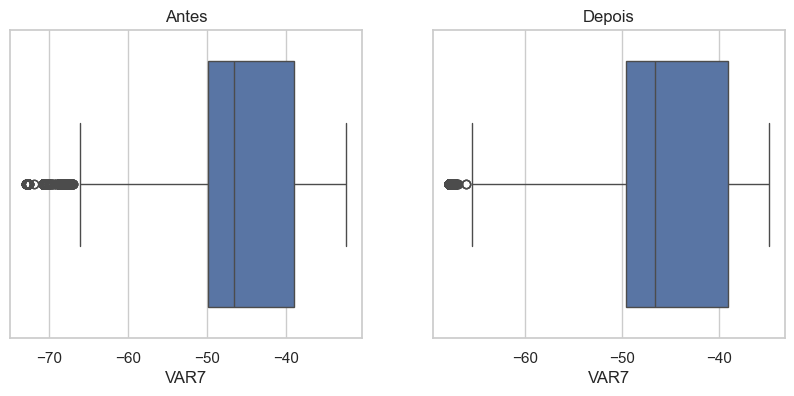

In [172]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_train[col])
plt.title("Antes")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_train_reduced[col])
plt.title("Depois")

plt.show()

Após a imputação dos valores ausentes, foi aplicado um tratamento conservador de valores
extremos por meio de winsorização, utilizando os quantis 1% e 99% calculados
exclusivamente na base de Treino. Essa estratégia visa reduzir a influência de outliers
extremos, preservando a ordem relativa dos dados e aumentando a estabilidade do modelo.


In [173]:
df_train_reduced.drop(columns=["missing_pattern_id"], inplace=True)


Embora a descoberta de padrões de erros no cadastro possa ser uma informação valiosa para a descoberta de fraudes ou e analise de credito, o paramtro missing_pattern_id necessita de uma análise dedicada exclusivamente a ele. E por tanto julgo que não deve ser o alvo dessa análise exploratória.

In [174]:
for df_ in [df_train_reduced, df_test_reduced, df_oot_reduced]:
    df_.drop(columns=["VAR148"], inplace=True)

In [175]:
diff_train_test = set(df_train_reduced.columns) - set(df_test_reduced.columns)
diff_test_train = set(df_test_reduced.columns) - set(df_train_reduced.columns)

diff_train_oot = set(df_train_reduced.columns) - set(df_oot_reduced.columns)
diff_oot_train = set(df_oot_reduced.columns) - set(df_train_reduced.columns)

diff_train_test, diff_test_train, diff_train_oot, diff_oot_train


(set(), set(), {'TARGET'}, set())

In [184]:
from pathlib import Path

DATA_DIR = PROJECT_ROOT / "data" / CHALLENGE_NAME
FINAL_DIR = DATA_DIR / "final"

# Criar pasta data/desafio_01/final se não existir
FINAL_DIR.mkdir(parents=True, exist_ok=True)

# ============================================================
# SALVAR DATASETS FINAIS
# ============================================================
df_train_reduced.to_parquet(FINAL_DIR / "train.parquet", index=False)
df_test_reduced.to_parquet(FINAL_DIR / "test.parquet", index=False)
df_oot_reduced.to_parquet(FINAL_DIR / "oot.parquet", index=False)

print("Datasets finais salvos com sucesso em:", FINAL_DIR.resolve())


Datasets finais salvos com sucesso em: C:\Users\ggrinspun\Github\desafio-analise-de-credito\data\desafio_01\final
